In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 1)
fc, pc, tc = data_instance.create_dataset(50, 2, [100], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_without_mapping(num_epochs=20, batch_size=20, learning_rate=0.001)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:151: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: -408428.9653751791
Epoch:1, Loss: -490114.75845021487
Epoch:2, Loss: -506451.917065222
Epoch:3, Loss: -509719.3487882234
Epoch:4, Loss: -510372.8351328237
Epoch:5, Loss: -510503.5324017438
Epoch:6, Loss: -510529.6718555278
Epoch:7, Loss: -510534.89974628465
Epoch:8, Loss: -510535.945324436
Epoch:9, Loss: -510536.1544400662
Epoch:10, Loss: -510536.19626319234
Epoch:11, Loss: -510536.2046278175
Epoch:12, Loss: -510536.2063007426
Epoch:13, Loss: -510536.20663532754
Epoch:14, Loss: -510536.2067022446
Epoch:15, Loss: -510536.2067156279
Epoch:16, Loss: -510536.20671830466
Epoch:17, Loss: -510536.20671884
Epoch:18, Loss: -510536.2067189471
Epoch:19, Loss: -510536.2067189685


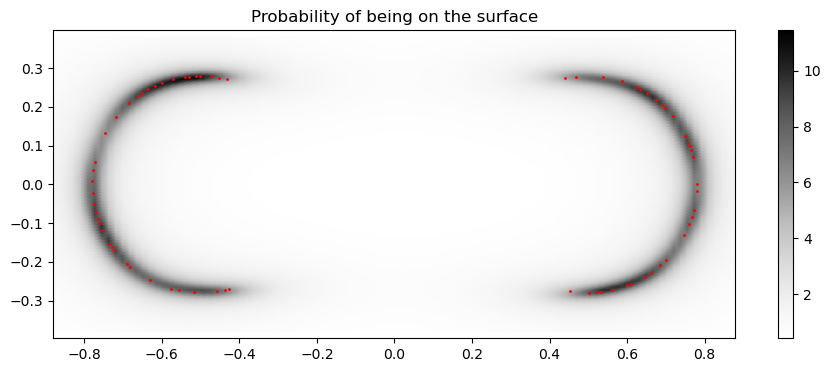

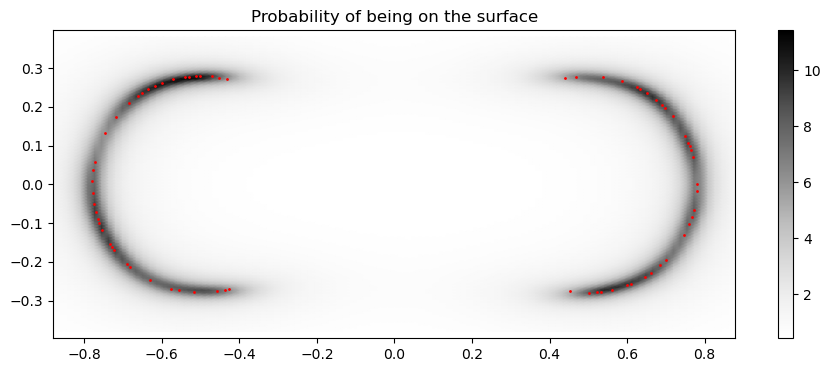

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[:2, :])

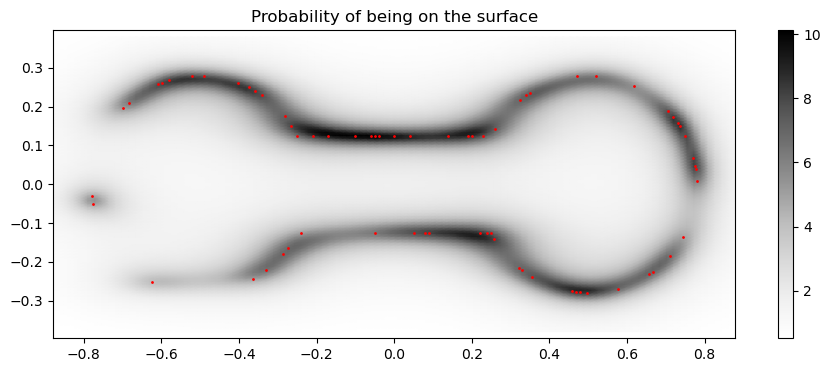

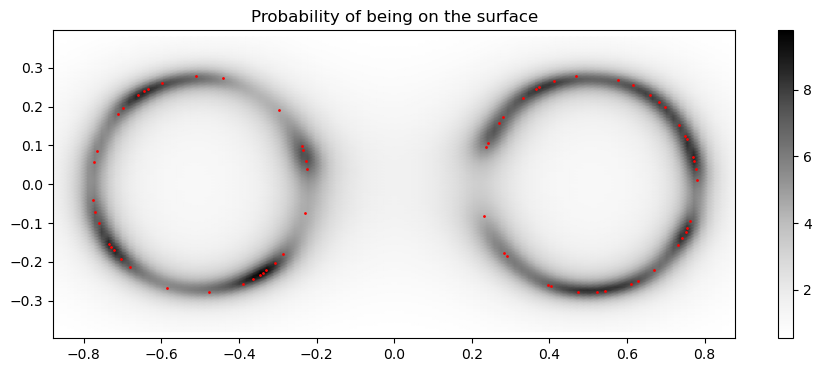

In [10]:
model.predict()

In [7]:
model.train_without_mapping(num_epochs=20, batch_size=20, learning_rate=0.001, loss_type='sq')

Epoch:0, Loss: 0.009175759367644786
Epoch:1, Loss: 0.011010911241173744
Epoch:2, Loss: 0.011377941615879536
Epoch:3, Loss: 0.011451347690820695
Epoch:4, Loss: 0.011466028905808926
Epoch:5, Loss: 0.011468965148806572
Epoch:6, Loss: 0.011469552397406102
Epoch:7, Loss: 0.011469669847126007
Epoch:8, Loss: 0.01146969333706999
Epoch:9, Loss: 0.011469698035058784
Epoch:10, Loss: 0.011469698974656543
Epoch:11, Loss: 0.011469699162576095
Epoch:12, Loss: 0.011469699200160005
Epoch:13, Loss: 0.011469699207676789
Epoch:14, Loss: 0.011469699209180145
Epoch:15, Loss: 0.011469699209480816
Epoch:16, Loss: 0.01146969920954095
Epoch:17, Loss: 0.011469699209552977
Epoch:18, Loss: 0.011469699209555383
Epoch:19, Loss: 0.011469699209555864


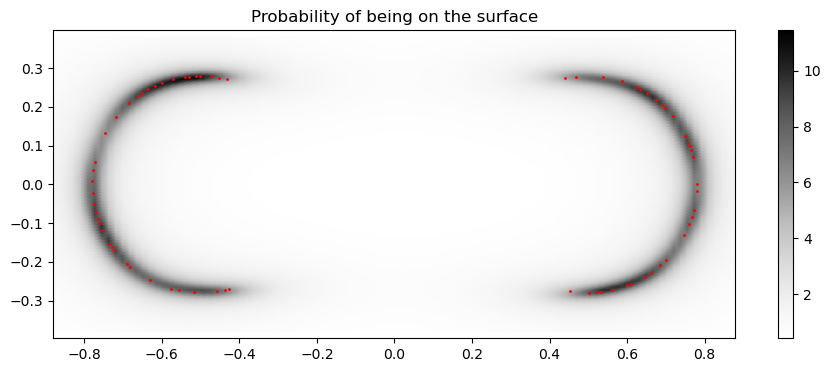

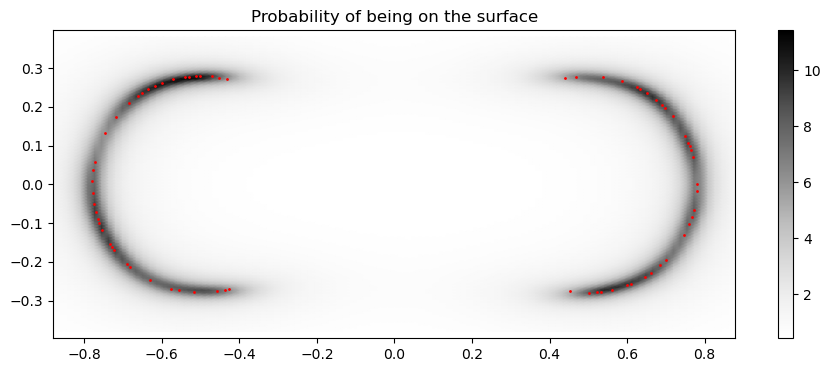

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[:2, :])

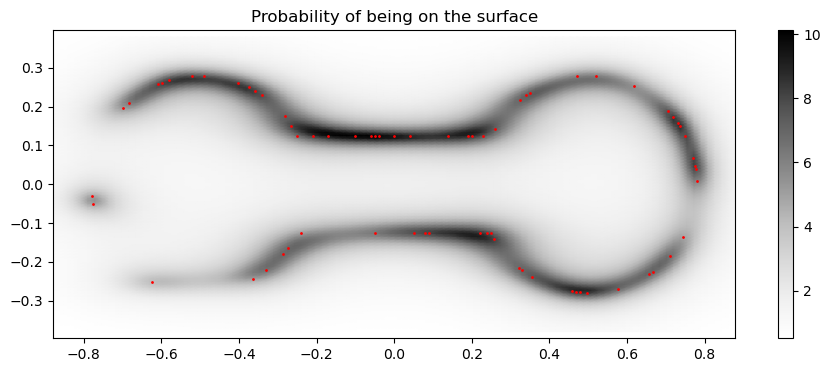

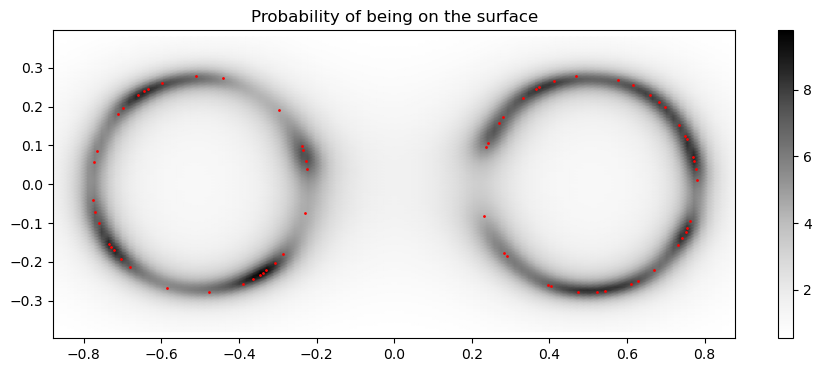

In [10]:
model.predict()